## PCA and gradient boosting on diamonds data

The Kaggle diamonds data set looks like a good candidate for dimensionality reduction because we know that many of the diamond features are correlated (such as the x,y,z dimensions, and number of carats).

Let's see how many principal components are needed to obtain a high explained variance ratio.  Also, let's see how the number of principal components relates to test error if we use the diamonds data for a regression problem.

### Instructions:
- there are 10 problems for you to solve
- replace YOUR CODE HERE with your own code
- do not make any other changes to the code (although you can put your name beneath the title if you want)

In [ ]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/diamonds.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_E        53940 non-null  uint8  
 12  color_F        53940 non-null  uint8  
 13  color_G        53940 non-null  uint8  
 14  color_H        53940 non-null  uint8  
 15  color_I        53940 non-null  uint8  
 16  color_J        53940 non-null  uint8  
 17  clarity_IF     53940 non-null  uint8  
 18  clarit

In [ ]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Preprocess data

In [ ]:
target = 'price'
predictors = list(df.columns)
predictors.remove(target)

X = df[predictors].values
y = df[target].values

print(predictors)
print(X.shape)

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
(53940, 23)


### Apply PCA

#### Problem 1

Apply PCA to X.  Compute the cumulative sum of the explained variance ratio for the number of principal components.  Note the 'explained_variance_ratio_' attribute of a PCA object.

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
print(np.round(cumsum, decimals=3))

[0.446 0.688 0.83  0.849 0.867 0.885 0.902 0.917 0.931 0.943 0.955 0.964
 0.972 0.98  0.985 0.99  0.993 0.996 0.997 0.999 0.999 1.    1.   ]


We are interested in the number of components needed to reach a value of explained variance ratio close to one, and also whether there is a clear elbow in the curve.

#### Problem 2

Plot the cumulative sum as a function of the number of principal.

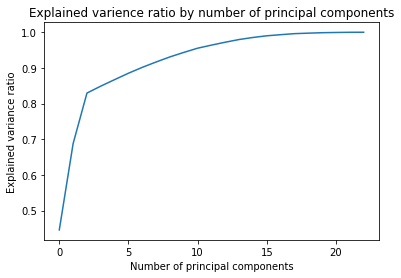

In [ ]:
plt.plot(cumsum)
plt.title('Explained varience ratio by number of principal components')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio');

### Reduce the data as needed to achieve at least 0.95 explained variance ratio

#### Problem 3

Compute NumPy array X_reduced, which is the version of with PCA and just enough of the principal components used to reach at least 0.95 explained variance ratio.

In [ ]:
X_reduced = PCA(n_components= 0.95).fit_transform(X)

In [ ]:
print('Number of principal components needed for 0.95 explained variance ratio: ', X_reduced.shape[1])

Number of principal components needed for 0.95 explained variance ratio:  11


### Use linear regression to predict price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Problem 4

Use linear regression on the full data set. Compute the RMSE on the test set.

In [ ]:
# YOUR CODE HERE
regr = LinearRegression()
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 1122.1
R squared: 0.921


### Try again, but this time with the reduced data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

#### Problem 5

Use linear regression on the reduced data set. Compute the RMSE on the reduced test set.

In [ ]:
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

We see a significant drop in RMSE when using the reduced data.

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 1778.1
R squared: 0.801


### Plot MSE as a function of the number of principal components

PCA is an unsupervised learning method: it does not reduced dimensionality in a way that takes into account what we want to do with the data.
Let's see how test error with linear regression changes as a function of the number of principal components that are used.

#### Problem 6

Compute a list (or array) num_components, which will contain the numbers from 1 to the number columns in X, and a list (or array) rmse, which will contain the test RMSE for the corresponding value in num_components.  

For example, the first value in num_components will be 1, and the first value in rmse will be the test RMSE for the predictions of linear regression when trained on the first principal component.

I imagine you will write a loop, with fit() and predict() operations applied in the loop to a LinearRegression object.

DO NOT compute PCA within the loop -- it does not need to be done in the loop and will slow things down a lot.

In [ ]:
num_components = np.arange(1, X.shape[1] + 1)
rmse = []
for i in range(len(num_components)):
  X_pca = PCA(n_components = i + 1).fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
  regr.fit(X_train, y_train)
  rmse.append(np.sqrt(((y_test - regr.predict(X_test))**2).mean()))

This plot is interesting.  It shows an elbow but at a different number of principal components than in the plot of explained variance ratio.

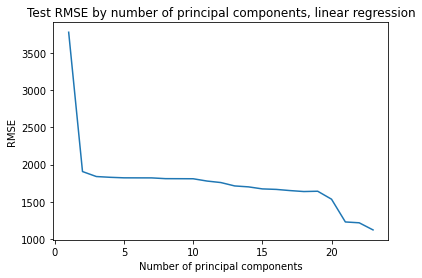

In [ ]:
plt.plot(num_components, rmse)
plt.title('Test RMSE by number of principal components, linear regression')
plt.xlabel('Number of principal components')
plt.ylabel('RMSE');

### Gradient boosting

Finally, let's take this opportunity to try gradient boosting.  This algorithm has many hyperparameters, but let's start with using default values except for n_estimators, which has a default of 100.  With 20 the algorithm will run faster, and this data set is not large, so we may not need many estimators.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Problem 7

Create a gradient boosting regressor with hyperparameter n_estimators set to 20.  Train your regressor, make predictions on the test data, and compute test RMSE as variable rmse.

In [ ]:
regr = GradientBoostingRegressor(n_estimators=20)
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

Interesting: not as good as linear regression in this case!

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 1322.5
R squared: 0.890


Let's try again, but with 200 estimators.

#### Problem 8

This is the same as the last problem, but use 200 for hyperparameter n_estimators.

In [ ]:
regr = GradientBoostingRegressor(n_estimators=200)
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

Now we do significantly better than linear regression.

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 797.7
R squared: 0.960


Again, but with 500 estimators.

#### Problem 9

This is the same as the last problem, but use 500 for hyperparameter n_estimators.  This may take a minute to train, depending on your machine.

In [ ]:
regr = GradientBoostingRegressor(n_estimators=500)
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 702.5
R squared: 0.969


As one final test, let's increase the maximum depth of the estimators (which are regression trees).  The default value is 3, so let's try 4 and also change n_estimators to 100.

#### Problem 10

This is the same as the last problem, but use 100 for hyperparameter n_estimators, and use 4 for hyperparameter max_depth. 

In [ ]:
regr = GradientBoostingRegressor(n_estimators=100, max_depth=4)
regr.fit(X_train, y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())

The result is similar to what we got with 200 estimators and a max_depth of 3.

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 784.0
R squared: 0.962
